In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn import tree, model_selection



In [3]:
df = pd.read_csv('pollution_us_2000_2016.csv')
df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [5]:
df.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [6]:
df = df.rename(columns={'NO2 AQI': 'NO2_AQI', 'O3 AQI': 'O3_AQI', 'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI' })
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2_AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [7]:
df = df.rename(columns={'NO2 Units': 'NO2_Units', 'O3 Units': 'O3_Units', 'SO2 Units': 'SO2_Units', 'CO Units': 'CO_Units' })
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2_Units,...,SO2_Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2_AQI,CO_Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [8]:
df = df.rename(columns={'NO2 1st Max Value': 'NO2_1st_Max_Value', 'O3 1st Max Value': 'O3_1st_Max_Value', 'SO2 1st Max Value': 'SO2_1st_Max_Value', 'CO 1st Max Valu': 'CO_1st_Max_Value' })
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2_Units,...,SO2_Units,SO2 Mean,SO2_1st_Max_Value,SO2 1st Max Hour,SO2_AQI,CO_Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [10]:
df = df.rename(columns={'NO2 1st Max Hour': 'NO2_1st_Max_Hour', 'O3 1st Max Hour': 'O3_1st_Max_Hour', 'SO2 1st Max Hour': 'SO2_1st_Max_Hour', 'CO 1st Max Hour': 'CO_1st_Max_Hour' })
df.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2_Units,...,SO2_Units,SO2 Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO Mean,CO 1st Max Value,CO_1st_Max_Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [11]:
df = df.rename(columns={'State Code': 'State_Code', 'County Code': 'County_Code', 'Site Num': 'Site_Num', 'Date Local': 'Date_Local' })
df.head(5)


,Unnamed: 0,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Units,...,SO2_Units,SO2 Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO Mean,CO 1st Max Value,CO_1st_Max_Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [12]:
df = df.rename(columns={'NO2 Mean': 'NO2_Mean', 'O3 Mean': 'O3_Mean', 'SO2 Mean': 'SO2_Mean', 'CO Mean': 'CO_Mean' })
df.head(5)


,Unnamed: 0,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Units,...,SO2_Units,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO_Mean,CO 1st Max Value,CO_1st_Max_Hour,CO_AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


([<matplotlib.axis.XTick at 0x7fbf82c31c90>,
 [Text(0, 0, 'Country Of Mexico'),
  Text(0, 0, 'District Of Columbia'),
  Text(0, 0, 'Arizona'),
  Text(0, 0, 'Colorado'),
  Text(0, 0, 'Missouri'),
  Text(0, 0, 'California'),
  Text(0, 0, 'Kansas'),
  Text(0, 0, 'Alaska'),
  Text(0, 0, 'Michigan'),
  Text(0, 0, 'New Jersey')])

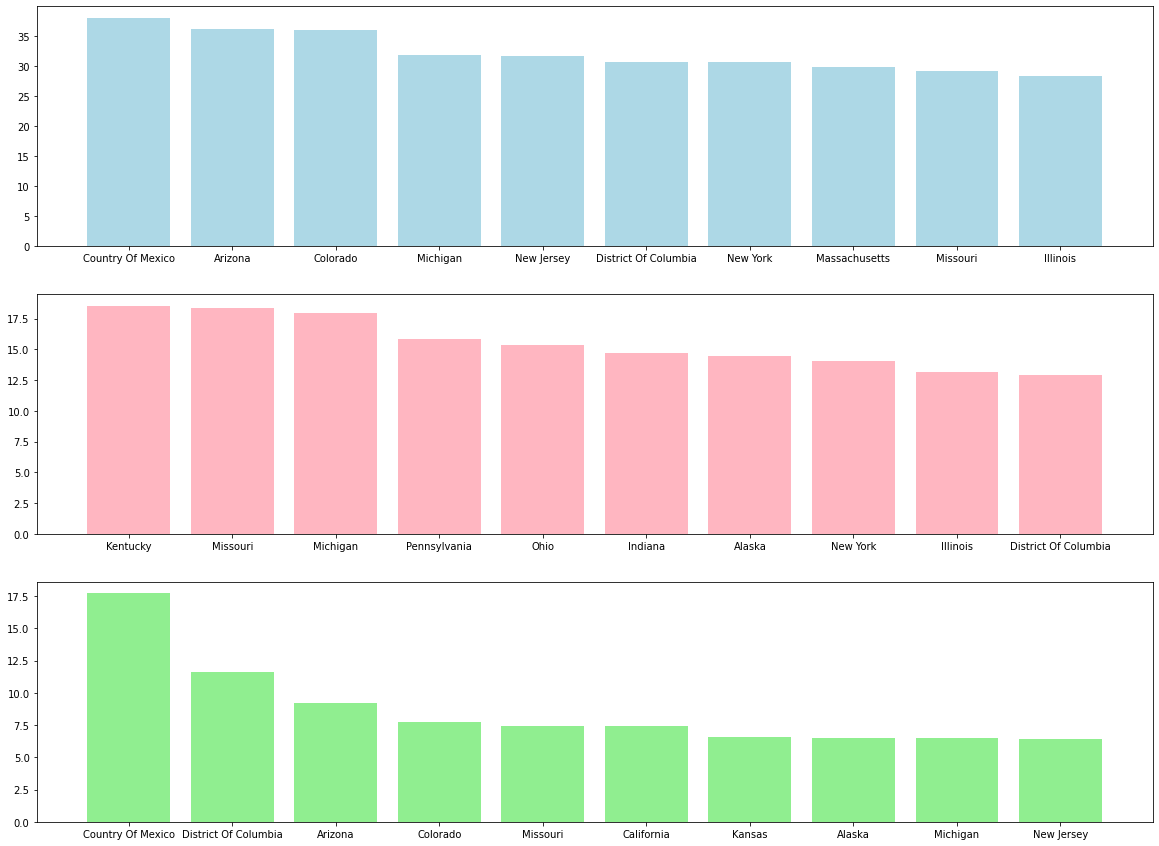

In [13]:
x = np.arange(10)
df_AQI = df[['State', 'Date_Local', 'NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)
plt.rcParams["figure.figsize"] = (20, 15) 

fig, axs = plt.subplots(3, 1)

# Plot for NO2
df_AQI_State.sort_values(by = 'NO2_AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2_AQI', data=df_AQI_State[:10], label = 'NO2', color = 'lightblue')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[0])
plt.xticks(x, xlabels) 
df_AQI_State.sort_values(by = 'SO2_AQI', ascending = False, inplace = True)
barplot3 = axs[1].bar(x, 'SO2_AQI', data=df_AQI_State[:10], label = 'SO2', color = 'lightpink')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[1])
plt.xticks(x, xlabels) 

# Plot for CO
df_AQI_State.sort_values(by = 'CO_AQI', ascending = False, inplace = True)
barplot4 = axs[2].bar(x, 'CO_AQI', data=df_AQI_State[:10], label = 'CO', color = 'lightgreen')
xlabels = df_AQI_State.loc[:10, 'State']
plt.sca(axs[2])
plt.xticks(x, xlabels) 

([<matplotlib.axis.XTick at 0x7fbf825d8450>,
 [Text(0, 0, 'BAJA CALIFORNIA NORTE'),
  Text(0, 0, 'Kern'),
  Text(0, 0, 'Imperial'),
  Text(0, 0, 'District of Columbia'),
  Text(0, 0, 'San Diego'),
  Text(0, 0, 'Maricopa'),
  Text(0, 0, 'Haywood'),
  Text(0, 0, 'Meigs'),
  Text(0, 0, 'Los Angeles'),
  Text(0, 0, 'Riverside')])

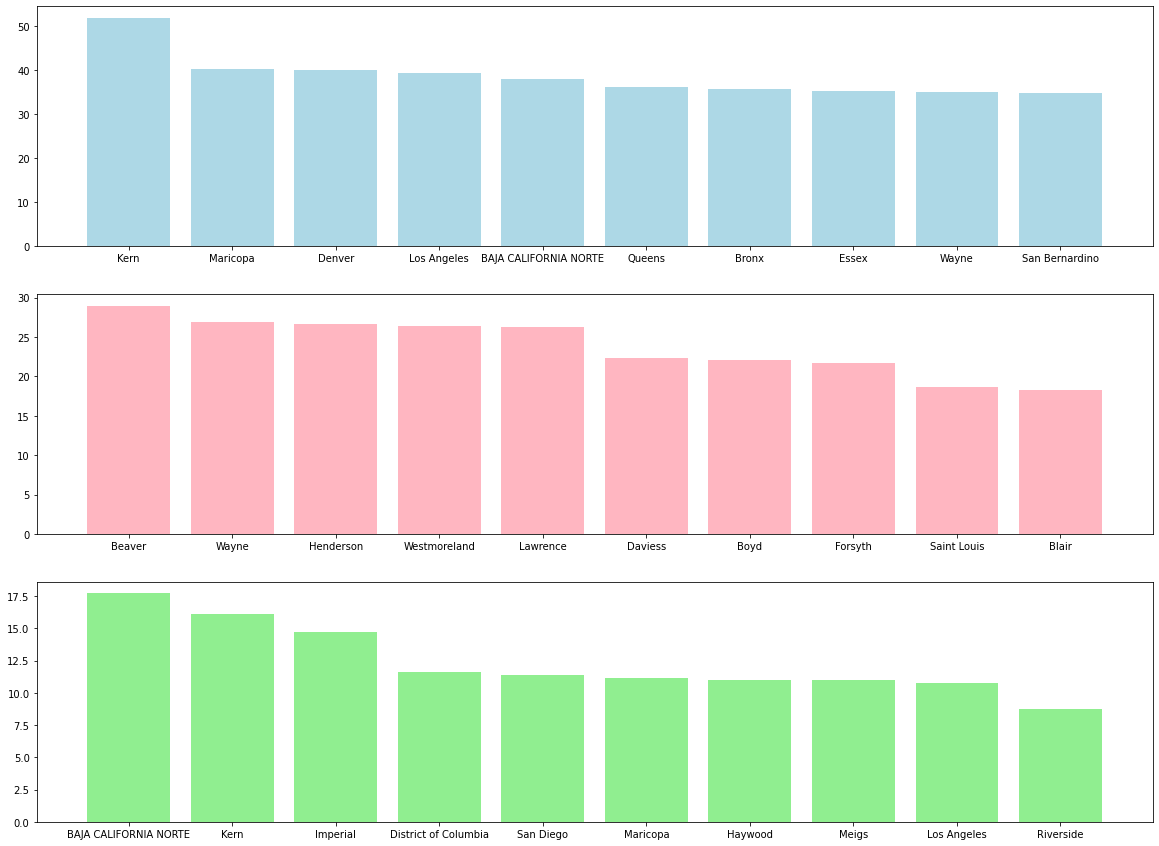

In [14]:
x = np.arange(10)
df_AQI = df[['County', 'Date_Local', 'NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']]
df_AQI_County = df_AQI.groupby('County').mean()
df_AQI_County.reset_index(inplace=True)
plt.rcParams["figure.figsize"] = (20, 15) 

fig, axs = plt.subplots(3, 1)

# Plot for NO2
df_AQI_County.sort_values(by = 'NO2_AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2_AQI', data=df_AQI_County[:10], label = 'NO2', color = 'lightblue')
xlabels = df_AQI_County.loc[:10, 'County']
plt.sca(axs[0])
plt.xticks(x, xlabels) 
df_AQI_County.sort_values(by = 'SO2_AQI', ascending = False, inplace = True)
barplot3 = axs[1].bar(x, 'SO2_AQI', data=df_AQI_County[:10], label = 'SO2', color = 'lightpink')
xlabels = df_AQI_County.loc[:10, 'County']
plt.sca(axs[1])
plt.xticks(x, xlabels) 


df_AQI_County.sort_values(by = 'CO_AQI', ascending = False, inplace = True)
barplot4 = axs[2].bar(x, 'CO_AQI', data=df_AQI_County[:10], label = 'CO', color = 'lightgreen')
xlabels = df_AQI_County.loc[:10, 'County']
plt.sca(axs[2])
plt.xticks(x, xlabels) 

In [15]:
# Checking missing values
df.isna().sum()

Unnamed: 0                0
State_Code                0
County_Code               0
Site_Num                  0
Address                   0
State                     0
County                    0
City                      0
Date_Local                0
NO2_Units                 0
NO2_Mean                  0
NO2_1st_Max_Value         0
NO2_1st_Max_Hour          0
NO2_AQI                   0
O3_Units                  0
O3_Mean                   0
O3_1st_Max_Value          0
O3_1st_Max_Hour           0
O3_AQI                    0
SO2_Units                 0
SO2_Mean                  0
SO2_1st_Max_Value         0
SO2_1st_Max_Hour          0
SO2_AQI              872907
CO_Units                  0
CO_Mean                   0
CO 1st Max Value          0
CO_1st_Max_Hour           0
CO_AQI               873323
dtype: int64

In [16]:
df = df.dropna()


In [17]:
#duplicate rows in each dataset
sum(df.duplicated())

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436876 entries, 1 to 1746658
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         436876 non-null  int64  
 1   State_Code         436876 non-null  int64  
 2   County_Code        436876 non-null  int64  
 3   Site_Num           436876 non-null  int64  
 4   Address            436876 non-null  object 
 5   State              436876 non-null  object 
 6   County             436876 non-null  object 
 7   City               436876 non-null  object 
 8   Date_Local         436876 non-null  object 
 9   NO2_Units          436876 non-null  object 
 10  NO2_Mean           436876 non-null  float64
 11  NO2_1st_Max_Value  436876 non-null  float64
 12  NO2_1st_Max_Hour   436876 non-null  int64  
 13  NO2_AQI            436876 non-null  int64  
 14  O3_Units           436876 non-null  object 
 15  O3_Mean            436876 non-null  float64
 16  O

In [19]:
#split dataset in features and target variable
feature_cols = ['County_Code', 'NO2_Mean','NO2_AQI','NO2_1st_Max_Value','O3_Mean','O3_AQI' ,'SO2_Mean','SO2_AQI','CO_Mean']
X = df[feature_cols] # Features
y = df['CO_AQI'] # Target variable


In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [21]:
X_train

,County_Code,NO2_Mean,NO2_AQI,NO2_1st_Max_Value,O3_Mean,O3_AQI,SO2_Mean,SO2_AQI,CO_Mean
148984,33,19.041667,29,31.0,0.023167,30,1.166667,6.0,0.866667
954770,19,1.652174,8,8.0,0.024778,26,0.041667,1.0,0.075000
1088013,19,11.869565,34,36.0,0.020667,30,0.000000,0.0,0.220833
448852,19,11.416667,25,27.0,0.030708,33,0.583333,6.0,0.350000
489648,163,18.916667,29,31.0,0.016083,21,29.000000,106.0,0.608333
...,...,...,...,...,...,...,...,...,...
1036199,5,33.291667,48,51.0,0.022125,37,4.854167,20.0,0.883333
1462707,650,7.191667,15,16.1,0.027708,39,0.929167,3.0,0.312500
527477,201,24.541667,50,53.0,0.018375,36,5.916667,19.0,0.150000
587210,11,4.916667,9,10.0,0.031000,33,1.208333,3.0,0.225000


(20.0, 0.0)

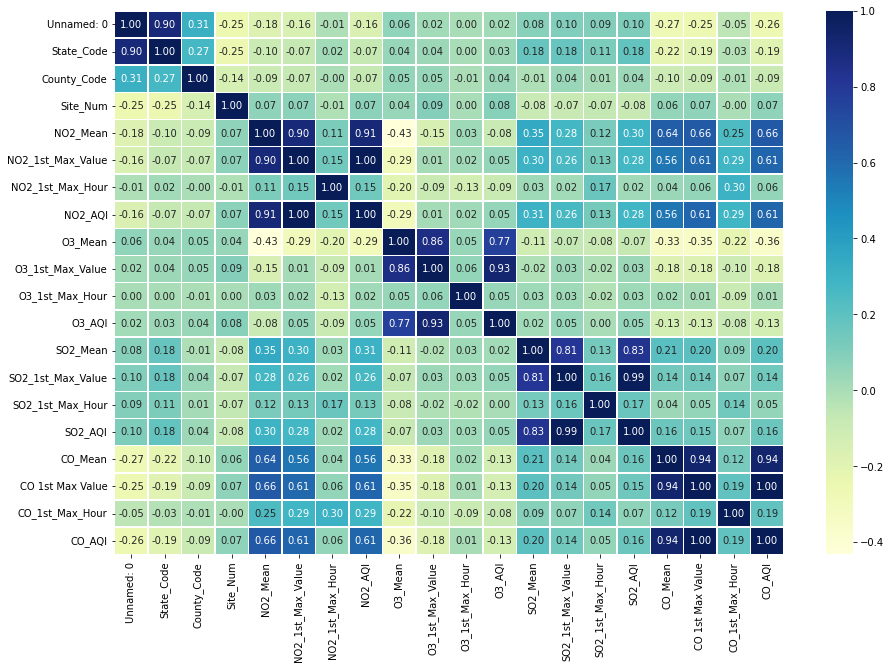

In [22]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [23]:


reg_log = LinearRegression()

reg_log.fit(X_train, y_train)

# Score the Model using cross validation

cross_val_score(
    reg_log, #model
    X_train, 
    y_train, 
    cv=5, 
    scoring="neg_mean_absolute_error" # scoring metric to use 
).mean()





-1.1210745001560363

In [24]:
preds_log = reg_log.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=preds_log)


1.119252844456267

In [25]:
r2_score(y_true=y_test, y_pred=preds_log)


0.8931433680829253

In [26]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')

reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=preds_forest)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.8889841968888197

In [27]:
reg_forest.feature_importances_

array([0.0158634 , 0.01706773, 0.00553842, 0.01884138, 0.016191  ,
       0.00941482, 0.01321475, 0.00798106, 0.89588744])

In [28]:
X_train.columns

Index(['County_Code', 'NO2_Mean', 'NO2_AQI', 'NO2_1st_Max_Value', 'O3_Mean',
       'O3_AQI', 'SO2_Mean', 'SO2_AQI', 'CO_Mean'],
      dtype='object')

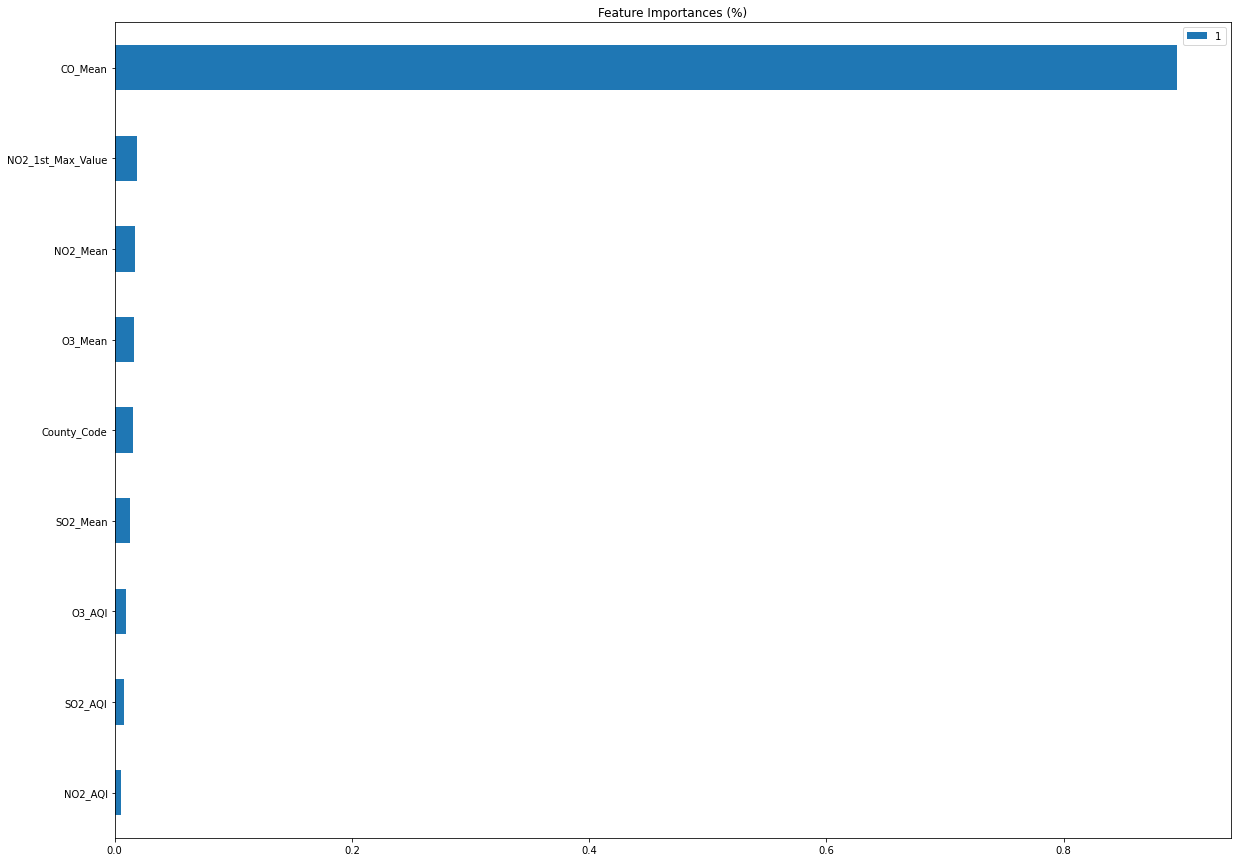

In [29]:
# Plot Feature Importances to Visualize better

pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [30]:
predictions = reg_log.predict(X_test)



In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,predictions))

1.119252844456267


In [34]:
print(metrics.mean_squared_error(y_test,predictions))

3.6619522867948873


In [35]:
y_train.value_counts(normalize=True)

3.0      0.167291
2.0      0.162963
5.0      0.131812
6.0      0.099571
7.0      0.074084
           ...   
201.0    0.000003
143.0    0.000003
173.0    0.000003
95.0     0.000003
118.0    0.000003
Name: CO_AQI, Length: 100, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

3.0      0.166519
2.0      0.163982
5.0      0.130408
6.0      0.101667
1.0      0.074181
           ...   
93.0     0.000009
88.0     0.000009
90.0     0.000009
135.0    0.000009
136.0    0.000009
Name: CO_AQI, Length: 84, dtype: float64